## **Sales Optimization and Dashboarding**

- This project leverage on the Cross Industry Standard Process for Data Mining (CRISP-DM) Approach to provide business intelligence for sales optimizations

### **Business Understanding**

- **Project Overview**

The client has gathered transactional data from the year 2019 but has not yet leveraged this information to inform their business strategy. The goal of this project is to analyze this data and deliver a comprehensive report that provides actionable insights. The client seeks to identify opportunities to increase sales and optimize operational efficiency.

- **Objective**

**Primary Goal**: Use the 2019 transactional data to uncover patterns, trends, and opportunities that can drive more sales and improve business processes.

**Secondary Goal**: Provide a clear roadmap based on data-driven insights that can support strategic decision-making and operational improvements.

- **Methodology**

To achieve these objectives, we will follow a systematic methodology that includes the following steps:

1. *Data Collection:* Retrieve transactional data for the entire year of 2019 from both CSV files (January to June) and the remote database (July to December).

2. *Data Preprocessing:* Clean and preprocess the data to handle missing values, outliers, and inconsistencies.

3. *Exploratory Data Analysis (EDA):* Conduct exploratory data analysis to gain insights into the distribution, trends, and patterns within the data.

4. *Statistical Analysis:* Perform statistical analysis to answer specific questions such as total revenue, seasonal trends, best-selling products, etc.

5. *Data Visualization:* Visualize the findings using charts, graphs, and tables to facilitate understanding and interpretation.

6. *Interpretation and Insights:* Provide actionable insights and recommendations based on the analysis to help the client make informed decisions.

7. *Report Generation:* Prepare a comprehensive report summarizing the analysis, findings, and recommendations for the client's reference.

- **Hypothesis Testing**

*Null Hypothesis, H<sub>0</sub>:* There is no relationship between Price Each and Quantity Ordered.


*Alternative Hypothesis, H<sub>1</sub>:* There is a relationship between Price Each and Quantity Ordered.

- **Analytical Questions**

1. How much money did we make this year? 

2. Can we identify any seasonality in the sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities ordered? 

7. You are required to show additional details from your findings in your data. 

NB: Products with unit prices above $99.99 should be labeled high-level products otherwise they should be basic level.

### **Data Understanding**

- **Data Description**

*Features*

   - Order ID - This feature represents a unique identifier for each order.

   - Product - This feature represents the name or type of product ordered.

   - Quantity Ordered - This feature represents the quantity of each product ordered

   - Price Each - This feature represents the price of each product.

   - Order Date - This feature represents the date and time when the order was placed

   - Purchase Address - This feature represents the address where the purchase was made

*Numerical Features*

   - Quantity Ordered

   - Price Each

*Categorical Features*

   - Order ID

   - Product

   - Purchase Address

*Date features*

   - Order Date

#### **Importing relevant libraries**

In [48]:
# Data Manipulation and Handling
import pandas as pd
import numpy as np
import pyodbc
from dotenv import dotenv_values

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats

# Other Utilities
import os
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

#### **Data Collection**

##### **Datasets from OneDrive**

In [2]:
# File path for the OneDrive dataset for analysis and modelling
file_path1 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\CAPSTONE PROJECT (AZUBI AFRICA)\\getINNOtized Transactional Sales Analysis\\Sales_Analysis_And_Dashboarding\\data\\Sales_January_2019.csv'

# Load the file into the notebook
jan_sales = pd.read_csv(file_path1)
jan_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [3]:
# File path for the OneDrive dataset for analysis and modelling
file_path2 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\CAPSTONE PROJECT (AZUBI AFRICA)\\getINNOtized Transactional Sales Analysis\\Sales_Analysis_And_Dashboarding\\data\\Sales_February_2019.csv'

# Load the file into the notebook
feb_sales = pd.read_csv(file_path2)
feb_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [4]:
# File path for the OneDrive dataset for analysis and modelling
file_path3 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\CAPSTONE PROJECT (AZUBI AFRICA)\\getINNOtized Transactional Sales Analysis\\Sales_Analysis_And_Dashboarding\\data\\Sales_March_2019.csv'

# Load the file into the notebook
mar_sales = pd.read_csv(file_path3)
mar_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [5]:
# File path for the OneDrive dataset for analysis and modelling
file_path4 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\CAPSTONE PROJECT (AZUBI AFRICA)\\getINNOtized Transactional Sales Analysis\\Sales_Analysis_And_Dashboarding\\data\\Sales_April_2019.csv'

# Load the file into the notebook
apr_sales = pd.read_csv(file_path4)
apr_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
# File path for the OneDrive dataset for analysis and modelling
file_path5 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\CAPSTONE PROJECT (AZUBI AFRICA)\\getINNOtized Transactional Sales Analysis\\Sales_Analysis_And_Dashboarding\\data\\Sales_May_2019.csv'

# Load the file into the notebook
may_sales = pd.read_csv(file_path5)
may_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [7]:
# File path for the OneDrive dataset for analysis and modelling
file_path6 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\CAPSTONE PROJECT (AZUBI AFRICA)\\getINNOtized Transactional Sales Analysis\\Sales_Analysis_And_Dashboarding\\data\\Sales_June_2019.csv'

# Load the file into the notebook
jun_sales = pd.read_csv(file_path6)
jun_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


#### **Merging all the 6 Dataframes (January - June, 2019) to become a Single Dataframe**

In [8]:
first_half_sales = pd.concat([jan_sales, feb_sales, mar_sales, apr_sales, may_sales, jun_sales], ignore_index = True)

first_half_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [9]:
first_half_sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
85620,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
85624,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


#### **Datasets from the Remote Database**

In [10]:
# Loading environment variables from .env file
environment_variables = dotenv_values('.env')
 
# Getting the values for the credentials set in the .env file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
 
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"
# Connecting to the server
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful")
except Exception as e:
    print(f"Connection failed: {e}")

Connection successful


In [11]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'dbo'
        """
# Read data from the SQL query result into a DataFrame using the established database connection
schema_df = pd.read_sql(db_query, connection)
 
#  Check whether data has been retrieved successfully to confirm successful connection to database
try:
    schema_df = pd.read_sql(db_query, connection)    
    print("Data retrieved successfully")
    print()
    print(schema_df)    
except Exception as e:
    print("Failed to retrieve data:", e)

Data retrieved successfully

  TABLE_CATALOG TABLE_SCHEMA            TABLE_NAME  TABLE_TYPE
0         dapDB          dbo       Sales_July_2019  BASE TABLE
1         dapDB          dbo     Sales_August_2019  BASE TABLE
2         dapDB          dbo  Sales_September_2019  BASE TABLE
3         dapDB          dbo    Sales_October_2019  BASE TABLE
4         dapDB          dbo   Sales_November_2019  BASE TABLE
5         dapDB          dbo   Sales_December_2019  BASE TABLE


In [12]:
# Querying the Database to determine the tables we are to use for analysis and modelling
query1 = "Select * from dbo.Sales_July_2019"

jul_sales = pd.read_sql(query1, connection)
jul_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [13]:
query2 = "Select * from dbo.Sales_August_2019"

aug_sales = pd.read_sql(query2, connection)
aug_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"


In [14]:
query3 = "Select * from dbo.Sales_September_2019"

sep_sales = pd.read_sql(query3, connection)
sep_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00.0000000,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00.0000000,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00.0000000,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00.0000000,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00.0000000,"125 5th St, Atlanta, GA 30301"


In [15]:
query4 = "Select * from dbo.Sales_October_2019"

oct_sales = pd.read_sql(query4, connection)
oct_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,259358.0,34in Ultrawide Monitor,1.0,379.989990,2028-10-19 10:56:00.0000000,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.989990,2028-10-19 17:26:00.0000000,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.990000,2024-10-19 17:20:00.0000000,"967 12th St, New York City, NY 10001"
3,259361.0,27in FHD Monitor,1.0,149.990005,2014-10-19 22:26:00.0000000,"628 Jefferson St, New York City, NY 10001"
4,259362.0,Wired Headphones,1.0,11.990000,2007-10-19 16:10:00.0000000,"534 14th St, Los Angeles, CA 90001"


In [16]:
query5 = "Select * from dbo.Sales_November_2019"

nov_sales = pd.read_sql(query5, connection)
nov_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"


In [17]:
query6 = "Select * from dbo.Sales_December_2019"

dec_sales = pd.read_sql(query6, connection)
dec_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301"


#### **Merging all the 6 Dataframes (July - December, 2019) to become a Single Dataframe**

In [18]:
second_half_sales = pd.concat([jul_sales, aug_sales, sep_sales, oct_sales, nov_sales, dec_sales], ignore_index = True)

second_half_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [19]:
second_half_sales.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
101220,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
101221,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
101222,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
101223,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"
101224,319670.0,Bose SoundSport Headphones,1.0,99.989998,2021-12-19 21:45:00.0000000,"747 Chestnut St, Los Angeles, CA 90001"


### **Data Preprocessing**

- #### **Data Cleaning of both Dataframes**

In [20]:
first_half_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [21]:
second_half_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [22]:
first_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85625 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB


In [23]:
second_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101225 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100925 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100925 non-null  object 
dtypes: float64(3), object(3)
memory usage: 4.6+ MB


In [24]:
# Checking shape of both Dataframes

first_half_sales.shape, second_half_sales.shape

((85625, 6), (101225, 6))

In [25]:
# Check missing values for both DataFrames
print("Missing values in first_half_sales:")
print(first_half_sales.isnull().sum())

print("\nMissing values in second_half_sales:")
print(second_half_sales.isnull().sum())

Missing values in first_half_sales:
Order ID            245
Product             245
Quantity Ordered    245
Price Each          245
Order Date          245
Purchase Address    245
dtype: int64

Missing values in second_half_sales:
Order_ID            495
Product             300
Quantity_Ordered    495
Price_Each          495
Order_Date          495
Purchase_Address    300
dtype: int64


In [28]:
# Display rows with missing values in first_half_sales
missing_first_half = first_half_sales[first_half_sales.isnull().any(axis = 1)]
print("Rows with missing values in first_half_sales:")
print(missing_first_half)

# Display rows with missing values in second_half_sales
missing_second_half = second_half_sales[second_half_sales.isnull().any(axis = 1)]
print("\nRows with missing values in second_half_sales:")
print(missing_second_half)

Rows with missing values in first_half_sales:
      Order ID Product Quantity Ordered Price Each Order Date Purchase Address
664        NaN     NaN              NaN        NaN        NaN              NaN
678        NaN     NaN              NaN        NaN        NaN              NaN
797        NaN     NaN              NaN        NaN        NaN              NaN
876        NaN     NaN              NaN        NaN        NaN              NaN
1299       NaN     NaN              NaN        NaN        NaN              NaN
...        ...     ...              ...        ...        ...              ...
84570      NaN     NaN              NaN        NaN        NaN              NaN
84643      NaN     NaN              NaN        NaN        NaN              NaN
84662      NaN     NaN              NaN        NaN        NaN              NaN
84735      NaN     NaN              NaN        NaN        NaN              NaN
85355      NaN     NaN              NaN        NaN        NaN              NaN

[245 

In [29]:
# Drop rows with missing values directly in the original DataFrames
first_half_sales.dropna(inplace = True)

second_half_sales.dropna(inplace = True)

# Check if missing values for both DataFrames have been dropped
print("Missing values in first_half_sales:")
print(first_half_sales.isnull().sum())

print("\nMissing values in second_half_sales:")
print(second_half_sales.isnull().sum())

Missing values in first_half_sales:
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Missing values in second_half_sales:
Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64


In [30]:
first_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85380 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [31]:
second_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100730 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100730 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100730 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


In [35]:
# Check for duplicated rows based on all columns
first_half_sales_duplicates = first_half_sales[first_half_sales.duplicated(keep = False)]
print("Duplicated rows in first_half_sales:")
print(first_half_sales_duplicates)

second_half_sales_duplicates = second_half_sales[second_half_sales.duplicated(keep = False)]
print("\nDuplicated rows in second_half_sales:")
print(second_half_sales_duplicates)

Duplicated rows in first_half_sales:
       Order ID                     Product  Quantity Ordered  Price Each  \
874      142071       AA Batteries (4-pack)                 1        3.84   
875      142071       AA Batteries (4-pack)                 1        3.84   
1073   Order ID                     Product  Quantity Ordered  Price Each   
1102   Order ID                     Product  Quantity Ordered  Price Each   
1194   Order ID                     Product  Quantity Ordered  Price Each   
...         ...                         ...               ...         ...   
83489    220882    Lightning Charging Cable                 1       14.95   
83490    220882    Lightning Charging Cable                 1       14.95   
84358    221711  Bose SoundSport Headphones                 1       99.99   
84359    221711  Bose SoundSport Headphones                 1       99.99   
85307  Order ID                     Product  Quantity Ordered  Price Each   

           Order Date                 

In [36]:
# Drop all instances of duplicated rows from first_half_sales
first_half_sales = first_half_sales.drop_duplicates(keep = 'first')
print(f"Shape of first_half_sales after dropping all instances of duplicates: {first_half_sales.shape}")

# Drop all instances of duplicated rows from second_half_sales
second_half_sales = second_half_sales.drop_duplicates(keep = 'first')
print(f"Shape of second_half_sales after dropping all instances of duplicates: {second_half_sales.shape}")

Shape of first_half_sales after dropping all instances of duplicates: (85113, 6)
Shape of second_half_sales after dropping all instances of duplicates: (100574, 6)


In [37]:
# Renaming columns to align properly with other columns

first_half_sales.rename(columns = {
    'Price Each': 'Price'
}, inplace = True)


second_half_sales.rename(columns = {
    'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}, inplace = True)

In [39]:
first_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85113 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85113 non-null  object
 1   Product           85113 non-null  object
 2   Quantity Ordered  85113 non-null  object
 3   Price             85113 non-null  object
 4   Order Date        85113 non-null  object
 5   Purchase Address  85113 non-null  object
dtypes: object(6)
memory usage: 4.5+ MB


In [40]:
second_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100574 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          100574 non-null  float64
 1   Product           100574 non-null  object 
 2   Quantity Ordered  100574 non-null  float64
 3   Price             100574 non-null  float64
 4   Order Date        100574 non-null  object 
 5   Purchase Address  100574 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


In [41]:
# Convert the 'Order Date' columns to datetime format

first_half_sales['Order Date'] = pd.to_datetime(first_half_sales['Order Date'], errors = 'coerce')

second_half_sales['Order Date'] = pd.to_datetime(second_half_sales['Order Date'], errors = 'coerce')

In [42]:
# Checking if the 'Order Date' columns have the dtypes datetime64
first_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85113 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          85113 non-null  object        
 1   Product           85113 non-null  object        
 2   Quantity Ordered  85113 non-null  object        
 3   Price             85113 non-null  object        
 4   Order Date        85112 non-null  datetime64[ns]
 5   Purchase Address  85113 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.5+ MB


In [43]:
second_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100574 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          100574 non-null  float64       
 1   Product           100574 non-null  object        
 2   Quantity Ordered  100574 non-null  float64       
 3   Price             100574 non-null  float64       
 4   Order Date        100574 non-null  datetime64[ns]
 5   Purchase Address  100574 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 5.4+ MB


In [51]:
# For first_half_sales, convert 'Order ID' to string type first to handle mixed types
first_half_sales['Order ID'] = first_half_sales['Order ID'].astype(str)

# Filter rows where 'Order ID' contains only digits
first_half_sales = first_half_sales[first_half_sales['Order ID'].str.isdigit()]

# Convert 'Order ID' to int64
first_half_sales['Order ID'] = first_half_sales['Order ID'].astype('int64')

# View the cleaned first_half_sales DataFrame
first_half_sales



,Order ID,Product,Quantity Ordered,Price,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
85620,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [52]:
# For second_half_sales, convert 'Order ID' from float to int64

# Drop rows with NaN values in 'Order ID'
second_half_sales = second_half_sales.dropna(subset=['Order ID'])

# Step 2: Convert 'Order ID' to int64
second_half_sales['Order ID'] = second_half_sales['Order ID'].astype('int64')

# View the cleaned second_half_sales DataFrame
second_half_sales

,Order ID,Product,Quantity Ordered,Price,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1.0,150.000000,2026-07-19 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1.0,300.000000,2005-07-19 08:55:00,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1.0,3.840000,2029-07-19 12:41:00,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1.0,3.840000,2028-07-19 10:15:00,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5.0,2.990000,2031-07-19 02:13:00,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
101220,319666,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
101221,319667,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
101222,319668,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
101223,319669,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


In [53]:
# For first_half_sales, convert 'Quantity Ordered' from object to int64

# Convert 'Quantity Ordered' to string to handle mixed types
first_half_sales['Quantity Ordered'] = first_half_sales['Quantity Ordered'].astype(str)

# Filter rows where 'Quantity Ordered' contains only digits
first_half_sales = first_half_sales[first_half_sales['Quantity Ordered'].str.isdigit()]

# Convert 'Quantity Ordered' to int64
first_half_sales['Quantity Ordered'] = first_half_sales['Quantity Ordered'].astype('int64')

# View the cleaned first_half_sales DataFrame
first_half_sales

,Order ID,Product,Quantity Ordered,Price,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
85620,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [54]:
# For second_half_sales, convert 'Quantity Ordered' from float to int64

# Drop rows with NaN values in 'Quantity Ordered'
second_half_sales = second_half_sales.dropna(subset = ['Quantity Ordered'])

# Convert 'Quantity Ordered' to int64
second_half_sales['Quantity Ordered'] = second_half_sales['Quantity Ordered'].astype('int64')

# View the cleaned second_half_sales DataFrame
second_half_sales

,Order ID,Product,Quantity Ordered,Price,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150.000000,2026-07-19 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300.000000,2005-07-19 08:55:00,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.840000,2029-07-19 12:41:00,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.840000,2028-07-19 10:15:00,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.990000,2031-07-19 02:13:00,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
101220,319666,Lightning Charging Cable,1,14.950000,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
101221,319667,AA Batteries (4-pack),2,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
101222,319668,Vareebadd Phone,1,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
101223,319669,Wired Headphones,1,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


In [55]:
# For first_half_sales, convert 'Price' from object to float64 with 2 decimal places

# Convert 'Price' to string to handle any mixed types and remove non-numeric characters
first_half_sales['Price'] = first_half_sales['Price'].astype(str)

# Remove any potential unwanted characters like commas or currency symbols
# Remove commas, dollar signs, etc.
first_half_sales['Price'] = first_half_sales['Price'].str.replace('[^\d.]', '', regex = True)

# Convert 'Price Each' to float64
first_half_sales['Price'] = first_half_sales['Price'].astype('float64')

# Round to 2 decimal places
first_half_sales['Price'] = first_half_sales['Price'].round(2)

# View the cleaned first_half_sales DataFrame
first_half_sales

,Order ID,Product,Quantity Ordered,Price,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
85620,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [56]:
# For second_half_sales, ensure 'Price' is in float64 and round to 2 decimal places

# Convert 'Price' to float64 (if not already)
second_half_sales['Price'] = second_half_sales['Price'].astype('float64')

# Round to 2 decimal places
second_half_sales['Price'] = second_half_sales['Price'].round(2)

# View the cleaned second_half_sales DataFrame
second_half_sales

,Order ID,Product,Quantity Ordered,Price,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150.00,2026-07-19 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300.00,2005-07-19 08:55:00,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,2029-07-19 12:41:00,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,2028-07-19 10:15:00,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,2031-07-19 02:13:00,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
101220,319666,Lightning Charging Cable,1,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
101221,319667,AA Batteries (4-pack),2,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
101222,319668,Vareebadd Phone,1,400.00,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
101223,319669,Wired Headphones,1,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


In [57]:
first_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85112 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          85112 non-null  int64         
 1   Product           85112 non-null  object        
 2   Quantity Ordered  85112 non-null  int64         
 3   Price             85112 non-null  float64       
 4   Order Date        85112 non-null  datetime64[ns]
 5   Purchase Address  85112 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.5+ MB


In [58]:
second_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100574 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          100574 non-null  int64         
 1   Product           100574 non-null  object        
 2   Quantity Ordered  100574 non-null  int64         
 3   Price             100574 non-null  float64       
 4   Order Date        100574 non-null  datetime64[ns]
 5   Purchase Address  100574 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


In [59]:
first_half_sales.shape, second_half_sales.shape

((85112, 6), (100574, 6))

- #### **Merging both Dataframes**

In [60]:
# Concatenate the DataFrames along the rows (axis = 0)
combined_2019_sales = pd.concat([first_half_sales, second_half_sales], axis = 0, ignore_index = True)

# View the combined DataFrame
combined_2019_sales

,Order ID,Product,Quantity Ordered,Price,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
185681,319666,Lightning Charging Cable,1,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
185682,319667,AA Batteries (4-pack),2,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
185683,319668,Vareebadd Phone,1,400.00,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
185684,319669,Wired Headphones,1,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


In [76]:
# Create the new column 'Product Classes' based on the condition
combined_2019_sales['Product Classes'] = np.where(combined_2019_sales['Price'] > 99.99, 
                                             'High-Level Product', 
                                             'Basic Level Product')


# Create a new column 'Cost of Items Purchased' as the product of 'Price Each' and 'Quantity Ordered'
combined_2019_sales['Cost of Items Purchased'] = combined_2019_sales['Price'] * combined_2019_sales['Quantity Ordered']

# View the updated DataFrame
combined_2019_sales

,Order ID,Product,Quantity Ordered,Price,Order Date,Purchase Address,Product Classes,Cost of Items Purchased
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",High-Level Product,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Basic Level Product,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Basic Level Product,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",High-Level Product,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Basic Level Product,11.99
...,...,...,...,...,...,...,...,...
185681,319666,Lightning Charging Cable,1,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",Basic Level Product,14.95
185682,319667,AA Batteries (4-pack),2,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",Basic Level Product,7.68
185683,319668,Vareebadd Phone,1,400.00,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",High-Level Product,400.00
185684,319669,Wired Headphones,1,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",Basic Level Product,11.99


### **Expolatory Data Analysis (E.D.A.)**

In [77]:
# Separating Numerical and categorical variables for easy analysis and EDA

cat_cols = combined_2019_sales.select_dtypes(include = ['object', 'bool']).columns
num_cols = combined_2019_sales.select_dtypes(include = ['number']).columns.tolist()

print("Categorical Variables:")
print(cat_cols)

print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Product', 'Purchase Address', 'Product Classes'], dtype='object')
Numerical Variables:
['Order ID', 'Quantity Ordered', 'Price', 'Cost of Items Purchased']


- #### **Statistics Summary**

In [78]:
combined_2019_sales.describe(include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Order ID,185686.0,NaN,NaN,NaN,230411.376227,141234.0,185833.25,230354.5,275028.75,319670.0,51511.717183
Product,185686,19,USB-C Charging Cable,21859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity Ordered,185686.0,NaN,NaN,NaN,1.124544,1.0,1.0,1.0,1.0,9.0,0.443069
Price,185686.0,NaN,NaN,NaN,184.519255,2.99,11.95,14.95,150.0,1700.0,332.843838
Order Date,185686,NaN,NaN,NaN,2017-11-12 13:09:00.319571456,2001-01-20 00:10:00,2015-08-19 19:22:15,2019-03-26 14:19:30,2019-06-20 17:08:45,2031-12-19 23:53:00,NaN
Purchase Address,185686,140787,"193 Forest St, San Francisco, CA 94016",9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Classes,185686,2,Basic Level Product,116786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cost of Items Purchased,185686.0,NaN,NaN,NaN,185.611936,2.99,11.95,14.95,150.0,3400.0,333.032118


- #### **Univariate Analysis**

Quantity Ordered
Skew: 4.83


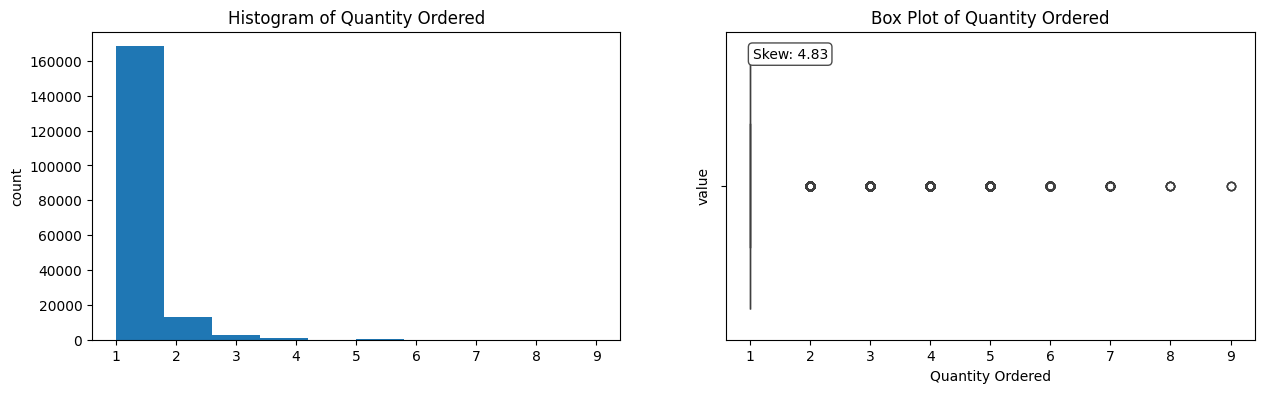

Price
Skew: 2.87


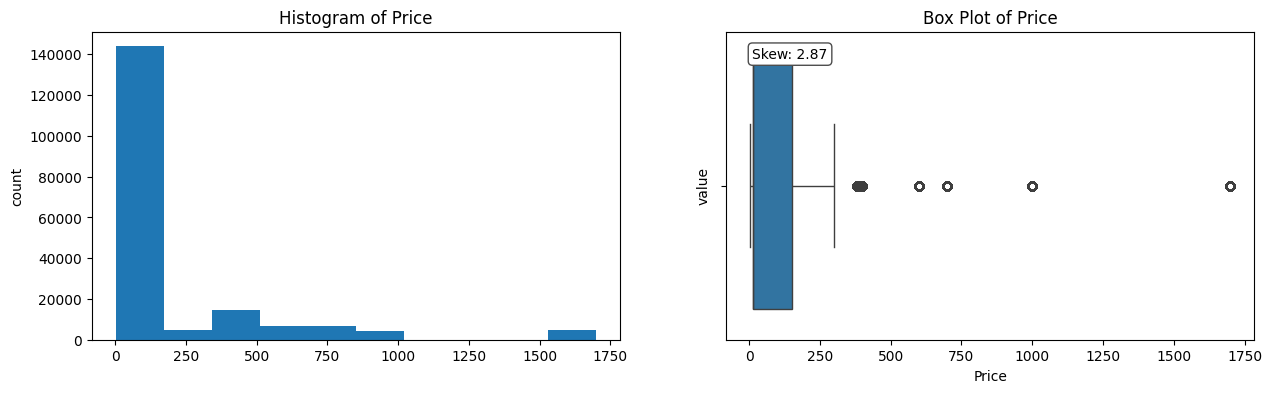

Cost of Items Purchased
Skew: 2.88


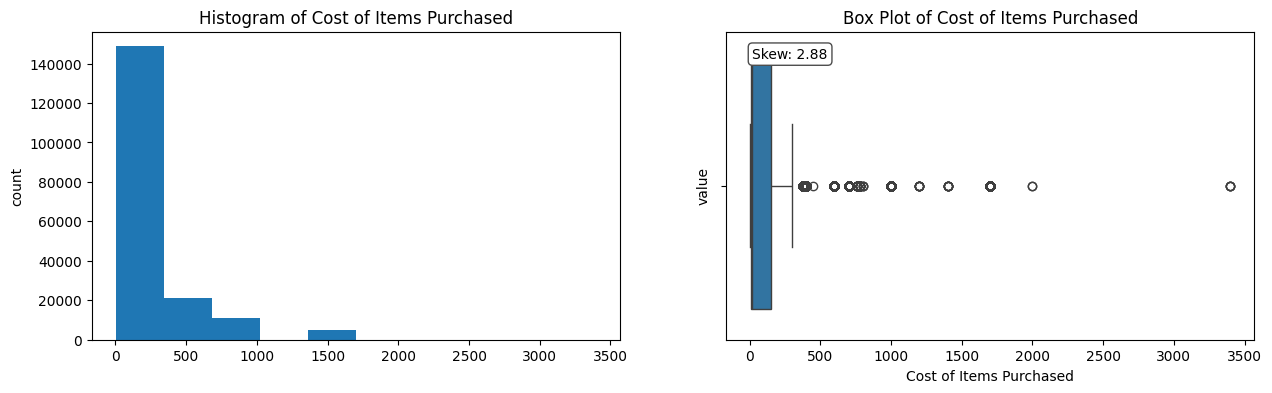

In [79]:
# Univariate analysis for the 2 numerical columns

# Define numerical columns excluding 'Order ID'
num_cols = ['Quantity Ordered', 'Price', 'Cost of Items Purchased']

for col in num_cols:
    # Print column name and skewness
    print(col)
    skewness = round(combined_2019_sales[col].skew(), 2)
    print(f'Skew: {skewness}')

    # Create the figure and subplots
    plt.figure(figsize = (15, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    combined_2019_sales[col].hist(grid=False)
    plt.ylabel('count')
    plt.title(f'Histogram of {col}')  # Add title to histogram

    # Boxplot with skewness indicator
    plt.subplot(1, 2, 2)
    sns.boxplot(x = combined_2019_sales[col])
    plt.ylabel('value')
    plt.title(f'Box Plot of {col}')  # Add title to boxplot

    # Add a text annotation to show skewness value on the boxplot
    ax = plt.gca()  # Get the current axes
    props = dict(boxstyle = "round", facecolor = "white", edgecolor = "0.3")
    text_skewness = f"Skew: {skewness}"
    ax.text(0.05, 0.95, text_skewness, transform = ax.transAxes, fontsize = 10, verticalalignment = "top", bbox = props)

    plt.show()

In [71]:
# Count the unique items in the 'Product' field and display their counts
product_counts = combined_2019_sales['Product'].value_counts()

# Print the counts
print(product_counts)

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64


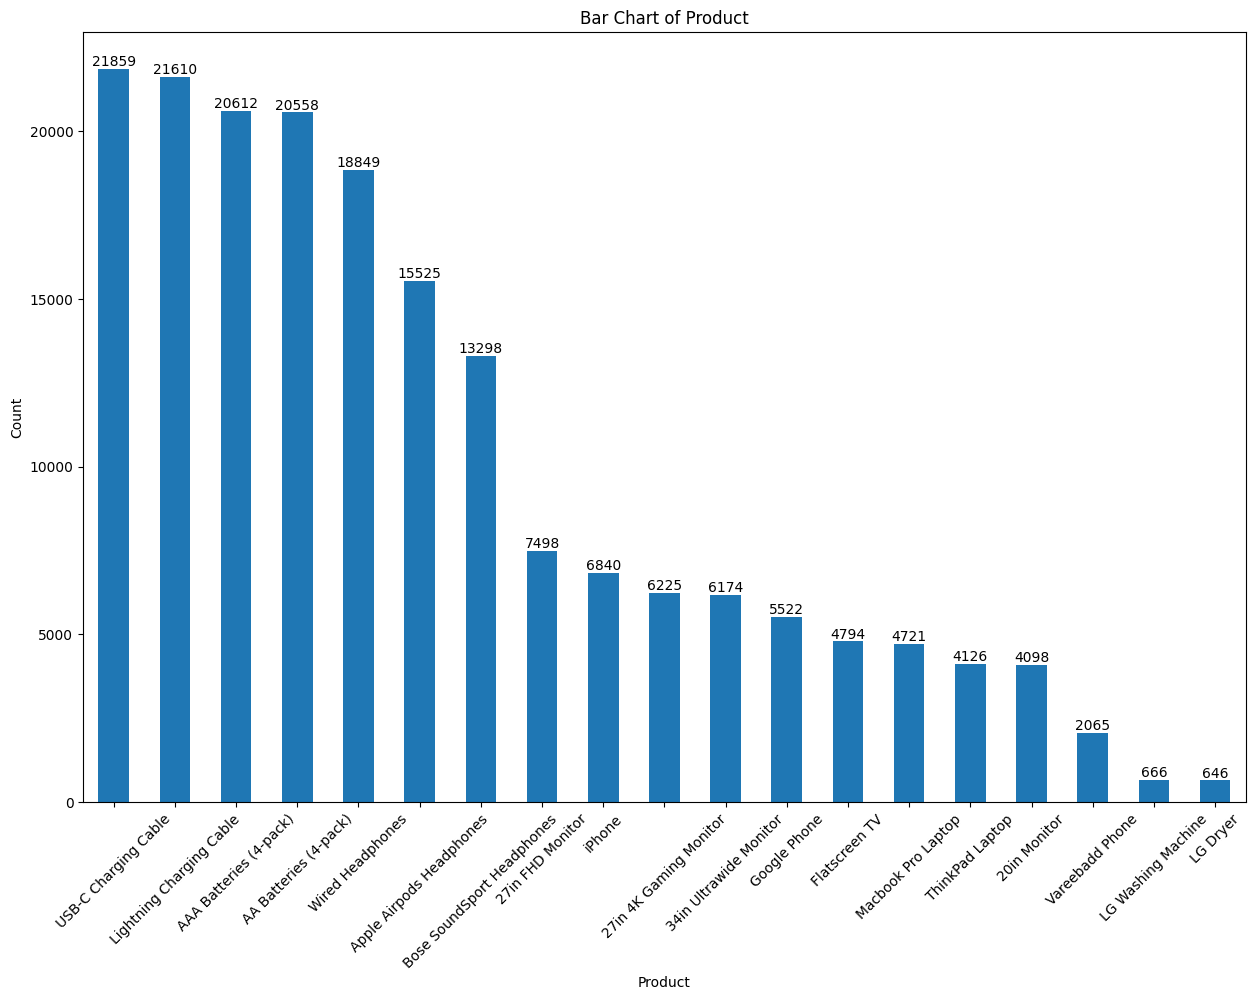

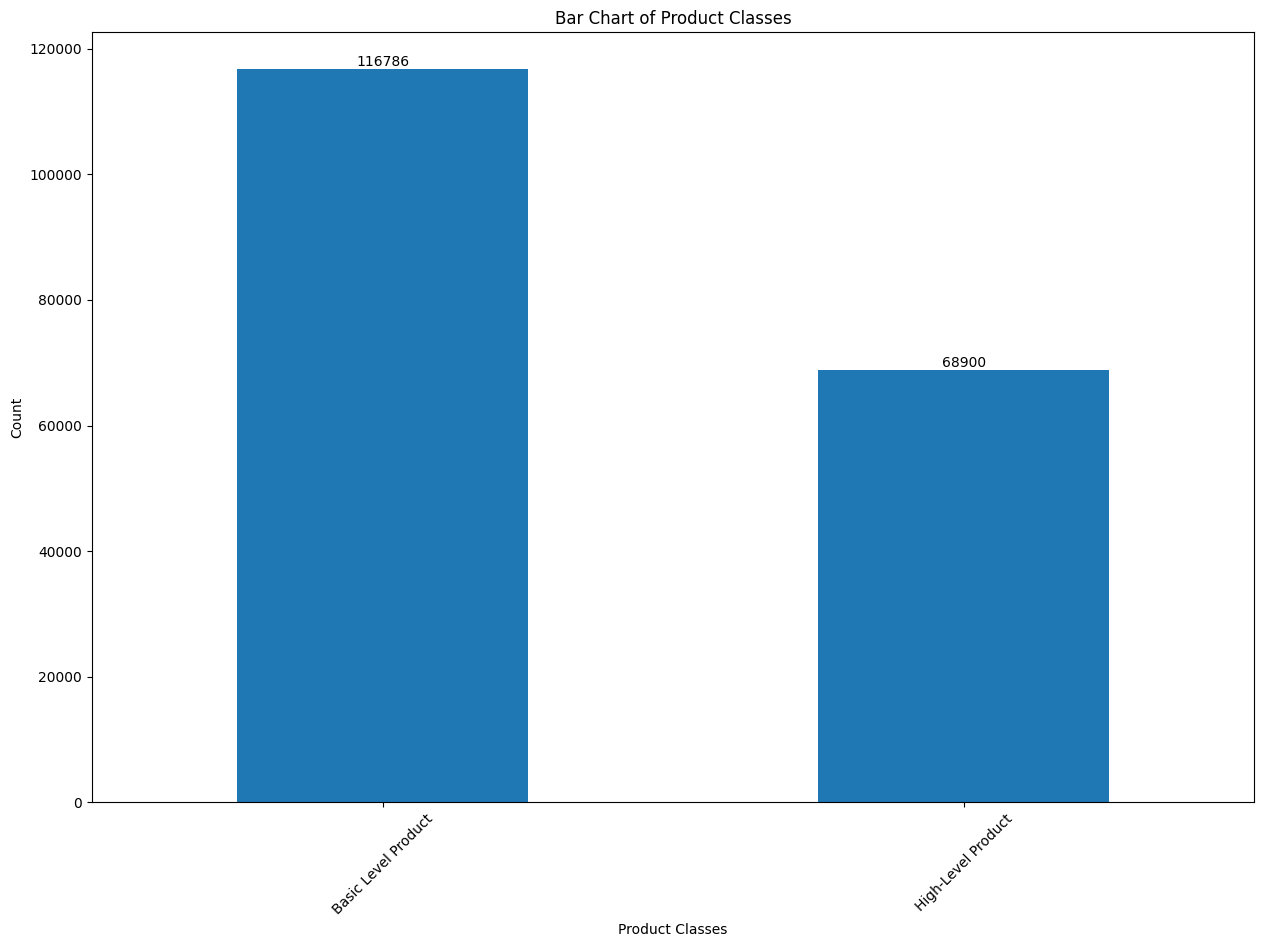

In [70]:
# Univariate analysis for the 2 categorical columns

# Define categorical columns excluding 'Purchase Address'
cat_cols = ['Product', 'Product Classes']

for column in cat_cols:
    plt.figure(figsize = (15, 10))
    counts = combined_2019_sales[column].value_counts()  # Get value counts

    # Create bar chart
    bars = counts.plot(kind = 'bar')

    # Annotate each bar with its count
    for bar, count in zip(bars.containers[0], counts):
      x = bar.get_x() + bar.get_width() / 2  # X-coordinate for text placement
      y = count  # Y-coordinate is the count itself
      plt.text(x, y, str(count), ha = 'center', va = 'bottom')  # Text placement and alignment

    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    plt.show()

- #### **Bivariate Analysis**

                  Quantity Ordered     Price
Quantity Ordered          1.000000 -0.148422
Price                    -0.148422  1.000000


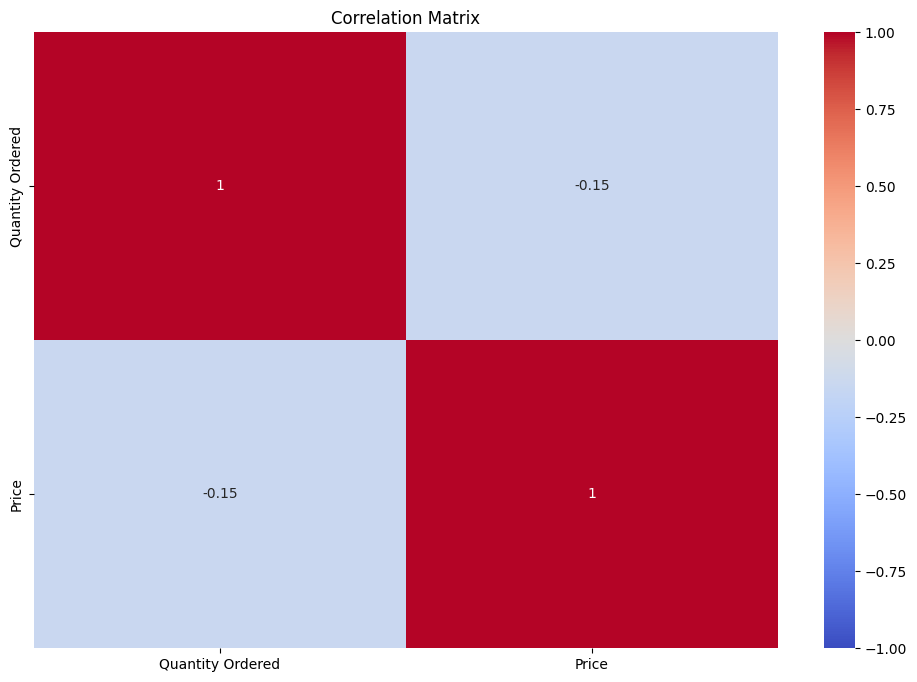

In [72]:
# Calculate and display the correlation matrix
correlation_matrix = combined_2019_sales[['Quantity Ordered', 'Price']].corr()
print(correlation_matrix)

plt.figure(figsize = (10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

                         Quantity Ordered  Cost of Items Purchased
Quantity Ordered                 1.000000                -0.139564
Cost of Items Purchased         -0.139564                 1.000000


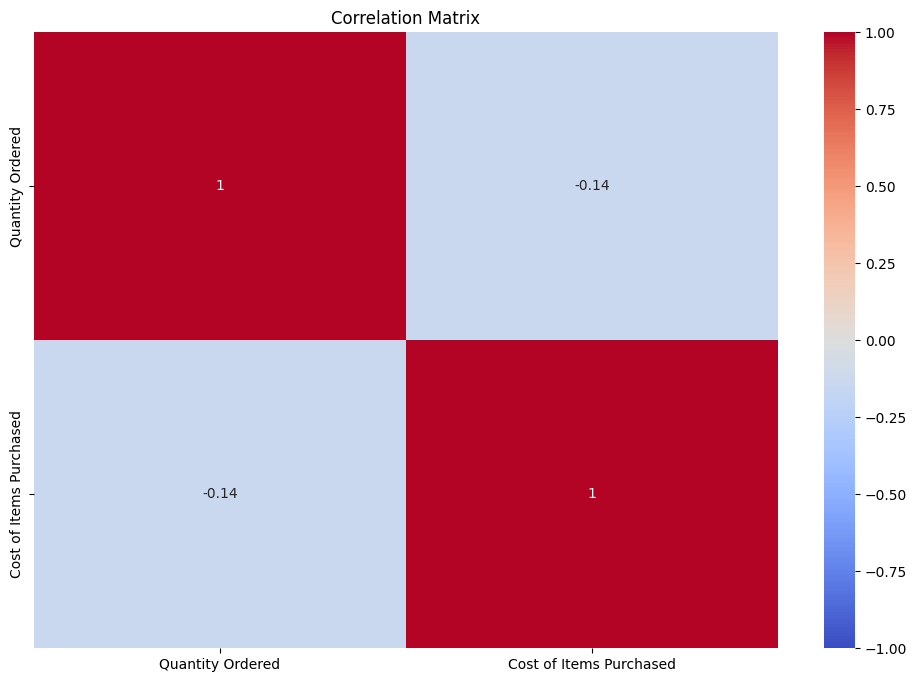

In [80]:
# Calculate and display the correlation matrix
correlation_matrix = combined_2019_sales[['Quantity Ordered', 'Cost of Items Purchased']].corr()
print(correlation_matrix)

plt.figure(figsize = (10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

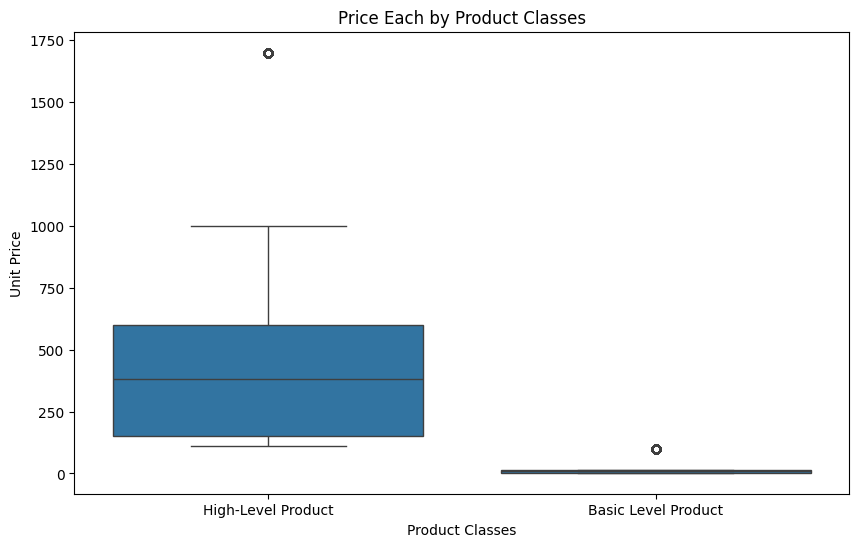

In [81]:
# Box plot of 'Price' by 'Product Classes'
plt.figure(figsize  = (10, 6))
sns.boxplot(data = combined_2019_sales, x ='Product Classes', y = 'Price')
plt.title('Price Each by Product Classes')
plt.xlabel('Product Classes')
plt.ylabel('Unit Price')
plt.show()

- #### **Multivariate Analysis**

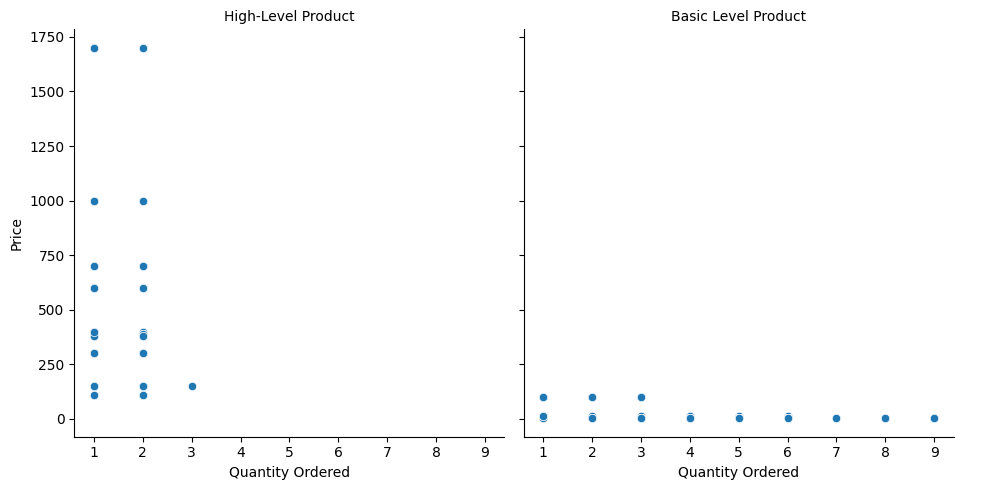

In [82]:
# Facet Grid to explore 'Price' and 'Quantity Ordered' by 'Product Classes'
g = sns.FacetGrid(combined_2019_sales, col = 'Product Classes', margin_titles = True, height = 5)
g.map_dataframe(sns.scatterplot, x = 'Quantity Ordered', y='Price')
g.add_legend()
g.set_axis_labels('Quantity Ordered', 'Price')
g.set_titles(col_template="{col_name}")
plt.show()


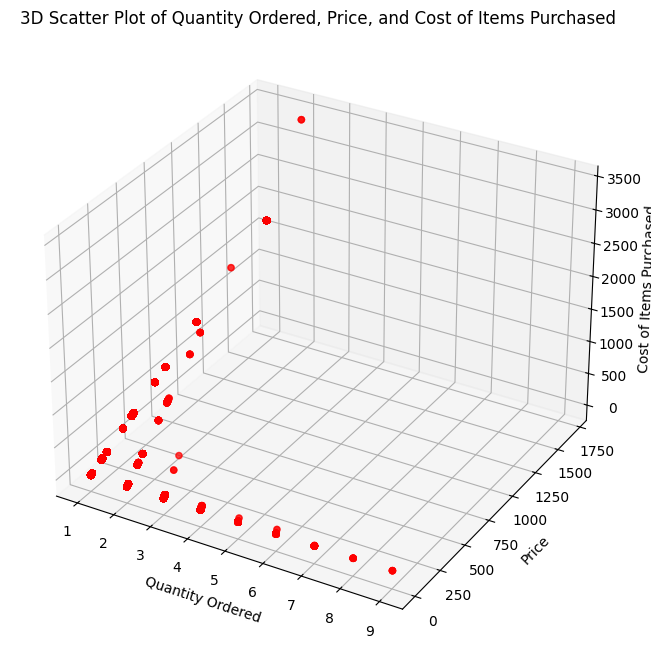

In [84]:
# Create a 3D scatter plot
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

# Plotting data
ax.scatter(combined_2019_sales['Quantity Ordered'], combined_2019_sales['Price'], combined_2019_sales['Cost of Items Purchased'], c = 'r', marker = 'o')

ax.set_xlabel('Quantity Ordered')
ax.set_ylabel('Price')
ax.set_zlabel('Cost of Items Purchased')
ax.set_title('3D Scatter Plot of Quantity Ordered, Price, and Cost of Items Purchased')

plt.show()